# <center>Projet Algorithmique</center>


### Version de base

Le choix du modèle et le code en Python capable de résoudre des instances de taille importante (plusieurs milliers de villes)

Une étude statistique du comportement expérimental de l'algorithme



## La tournée des villes :

La tournée se représente sous forme de graphe.
On a décidé de représenter les villes par des points et
Ce graphe est pondéré où chaque point représente une ville et le poids de chaque arête correspond à une route.

    Mettre un graphe

Ce graphe est connexe car chaque ville est au minimum relié à une autre ville par une route.
Il est aussi incomplet car toutes les villes ne sont pas reliées directement entre elles.
Le graphe est non orienté, il n'y a donc pas de sens unique dans le parcours.



# Représentation formelle

---

<aside>
💡 On considère pour la suite :

<br>

Le graphe pondéré non orienté $G = (X, A, \mathcal{G})$ avec X l’ensemble des sommets tel que $x \in X$ est appelé sommet.

A une partie de $X\times X$, l’ensemble des arrêtes tel que : $\overline{u} \in \rm A$ où $\overline{u}$ est une arrête de G.

On considère l’application $\mathcal{l}: A \to \mathbb{N}$ renvoyant la longueure (en mètre) d’une arrête de $A$.

On considère l’application $\mathcal{p}: A \to \mathbb{N}$ renvoyant le coût (en €) d’une arrête de $A$.

On considère l’application $\mathcal{deg}: X \to \mathbb{N}$ renvoyant le degrès d’un sommet de X.

On supposera:

- $G$ connexe
- Sans puits $\leftrightarrow \forall x \in X, deg(x) > 1$
- Sans boucle $\leftrightarrow \forall \overline{u} \in A, \forall x \in X, \nexists \overline{u} = (x,x)$
- $G$ non complet (pour être réaliste)



## Des routes :

Sur le graphe chaque arête représente une route.

Le graphe étant pondéré, le poids de chaque route correspond au temps qu’il faut pour la parcourir en tenant compte du trafic et de toute autre contrainte pouvant influencer sur le temps.


## Du problème

---

Le problème consiste à trouver le chemin de plus courte durée pour réaliser la tournée d’un ensemble de ville. Entre autres, à partir d’un graphe il faut partir d’un point A, parcourir l’ensemble des points du graphe, et revenir à ce même point A en un minimum de temps possible. De plus, il faut pouvoir minimiser la durée totale de la tournée en tenant compte du trafic sur chaque route mais aussi de toute autre contrainte pouvant nous faire perdre du temps.



### De l’objectif à optimiser

---

## Données :

- Le graphe G
- Une liste $L$ de sommets appartenant à G
- Un point de départ D


## Problème

Existe-t-il une tournée passant au moins une fois par chacune de nos villes de _G_ et dont le temps de la tournée est minimal ?

Soit $\mu$ un chemin, on obtient donc la longueur d’un chemin $\mathcal{l}(\mu) = \sum_{u\in\mu} \mathcal{l}(u)$

Le but est donc de minimiser $\mathcal{l}(\mu)$

<aside>
<br>

⚠️ **Contraintes :** <br>

- **Temps supplémentaire avec le traffic:**
  Le temps de parcours d’une arête varie au cours du temps pour représenter la variation du trafic. Un coefficient sera ajouté au temps de trajet de la route

</aside>



# Complexité théorique du problème

---

Pour réaliser la tournée, nous devons trouver un algorithme afin de trouver un cycle hamiltonien (Tournée plus retours au point de départ).

Nous avons choisi de réduire notre problème au problème du **_Voyageur de commerce_**

> Il s’agit d’un problème d'optimisation qui consiste à déterminer, étant donné une liste de villes et les distances entre toutes les paires de villes, le plus court circuit qui passe par chaque ville une et une seule fois.

Malgré la simplicité de l’énoncé, on ne connaît pas d'algorithme permettant de trouver une solution exacte rapidement dans tous les cas. Plus précisément, on ne connaît pas d'algorithme en temps polynomial, et la version décisionnelle du problème du voyageur de commerce

Le voyageur du commerce souhaite répondre à la question suivante : Pour une distance D, existe-t-il un chemin plus court que D passant par toutes les villes et qui termine dans la ville de départ ?

Ce problème d’optimisation est un problème NP-complet, ce qui est un indice de sa difficulté.

Pour montrer que le problème du voyageur de commerce est NP-Complet, il faut d’abord montrer qu’il est NP-Difficile. Pour cela nous allons faire une réduction à partir du problème de Cycle Hamiltonien qui, nous le savons déjà, est NP-Complet.

Nous allons donc transformer, en temps polynomial, une instance du Cycle Hamiltonien en instance du Voyageur de Commerce, de façon que les deux instances admettent la même réponse.
</br>
$\forall\:problèmes\,p, \;p \in \mathcal{NP}-complet \leftrightarrow p \in \mathcal{NP}-Difficile\, \cap \mathcal{NP}$



### Exemple du voyageur de commerce:

Vérification de l’appartenance à NP

Le problème est dans NP car étant donné une suite de sommets, on peut vérifier en temps polynomial (plus précisément en temps linéaire) si c’est un circuit, s’il passe au moins une fois par chaque sommet, et si son coût est inférieur à _k_.

Vérification de l’appartenance à NP-Difficile

Voyageur de Commerce considère un graphe complet arête-valué, mais qu'il autorise à passer plusieurs fois par certains sommets, du moment que le circuit total est de taille inférieure à _k_ (on considère le problème de décision sur lequel est basé le problème d'optimisation, _k_ est donc un paramètre d'entrée).

L'idée générale de cette réduction polynomiale est de construire l’instance de Cycle Hamiltonien en rajoutant les arêtes manquantes, mais avec une valeur de 2 (et en considérant une valeur de 1 pour les arêtes déjà présentes) de manière à rendre leur usage trop couteux, et en considérant un _k_ correspondant au nombre de sommets (on notera que cette transformation se fait en temps polynomial).

![photo.jpg](img\photo.jpg)

De cette manière, si la réponse à l'instance de Voyageur de Commerce est _oui_, on sait que le circuit auquel correspond cette réponse passe une et une seule fois par les sommets du graphe, et n'emprunte que les arêtes du graphe de Cycle Hamiltonien. Tout cycle empruntant une des arêtes manquantes dans Cycle Hamiltonien aurait une taille supérieure à _k_, puisque les autres arêtes qu'on a ajoutées ont une taille supérieure à 1. Idem pour les cycles passant plusieurs fois par un sommet. Donc la réponse pour l'instance de Cycle Hamiltonien est _oui_ aussi. Idem si la réponse est _non_. Puisqu'on est capable de transformer en temps polynomial une instance de Cycle Hamiltonien en instance de Voyageur de Commerce, de manière à conserver la réponse, Voyageur de Commerce est au moins aussi difficile que Cycle Hamiltonien. Comme Cycle Hamiltonien est NP-Difficile, et que Voyageur de Commerce est dans NP, Voyageur de Commerce est NP-Complet.



# Problème d’optimisation



# Problème d’optimisation

### Variable de décision du programme

$\mu$ qui représente un chemin solutionnant notre problème.

### Contraintes du programme

Les contraintes sont des conditions sur l'usage des ressources, c'est à dire des conditions que doivent respecter les valeurs des variables de décision pour former une solution _admissible_.

<blockquote>
Contrainte : Ajouter du temps de trajet lors des heures d’embouteillage

$$
7\leq time \leq 8 \rightarrow time = time \times [1.1,2[
$$

$$
12\leq time \leq 13 \rightarrow time = time \times [1.1,2[
$$

$$
17\leq time \leq 18 \rightarrow time = time \times [1.1,2[
$$

Contrainte de non négativité :

$$
\mathcal{l}(\mu)\space et \space \mathcal{p}(\mu) \geq 0 ~\forall \mu \in[1, n] \space avec \space n\space la \space longueur \space du \space tableau
$$

</blockquote>



### Fonction économique

La fonction économique décrit ce qu'on veut optimiser lors de l'usage de nos ressources. C'est donc une fonction de nos variables de décision, que l'on doit maximiser ou minimiser. Comme pour les contraintes, dans un programme linéaire, cette fonction économique doit être elle-même linéaire.

<blockquote>
La fonction économique doit minimiser le coût de la tournée, on obtient :<br />
</blockquote>

Soit $\mu$ un chemin, on obtient donc la longueur d’un chemin, minimiser la longueur du chemin donc minimiser : $\mathcal{l}(\mu) = \sum_{u\in\mu} \mathcal{l}(u)$

# Génération et traitement de notre graphe

Afin de répondre à notre besoin, on génère une matrice carrée d'ordre 1000 (donc 1000 villes).
Cette matrice sera la base de tout, elle respecte les contraintes de G. On peut en obtenir le graphe non-complet ci-dessous représentant l’ensemble de nos villes :

![](img/matrice1000.png)

Puisque c'est difficilement lisible on prendra comme exemple une matrice carrée d'ordre 10 que voici.

![](img/matrice10.png)

On stocke dans un dictionnaire les informations concernant les voisins d’un sommet et les différents paramètres des arrêtes.
Nous utilisons un dictionnaire pour des soucis d’efficacités, cela nous permet de parcourir uniquement le dictionnaire pour avoir les infos.


In [15]:
mon_dico_exemple = {
    0: [{'bool_chemin': 1, 'voisin': 3, 'distance': 38, 'vitesse': 130, 'temps': 18, 'consommation': 9.6, 'peage': 5.3, 'cout': 6.6, 'total': 11.9},
        {'bool_chemin': 1, 'voisin': 7, 'distance': 38, 'vitesse': 90, 'temps': 25, 'consommation': 8, 'peage': 0, 'cout': 5.5, 'total': 5.5},
        {'bool_chemin': 1, 'voisin': 8, 'distance': 47, 'vitesse': 130, 'temps': 22, 'consommation': 9.6, 'peage': 6.1, 'cout': 8.1, 'total': 14.2}]
}

SyntaxError: unterminated string literal (detected at line 3) (4238118440.py, line 3)

Ce dico représente les voisins de la ville 0 ainsi que toutes les caractéristiques des différents chemins reliant les sommets.
![](img/expication_dico.png)

Il faut imaginer un dico respectant ce principe mais à plus grande échelle afin d'obtenir le premier graphe de 1000 villes.

En ce qui concerne la tournée, on choisit les points par lesquels on souhaite passer. Une fois choisit, dans le but de mettre notre algorithme génétique dans de meilleurs conditions, on extrait un sous-graphe du graphe principale avec l'aide de djikstra pour obtenir le chemin le plus court pour toutes les combinaisons possible. Cela nous donne le graphe complet ci-dessous:

![](img/sous-graphe.png)



Ce dico représente les voisins de la ville 0 ainsi que toutes les caractéristiques des différents chemins reliant les sommets.
![](img/expication_dico.png)

Il faut imaginer un dico respectant ce principe mais à plus grande échelle afin d'obtenir le premier graphe de 1000 villes.

En ce qui concerne la tournée, on choisit les points par lesquels on souhaite passer. Une fois choisit, dans le but de mettre notre algorithme génétique dans de meilleurs conditions, on extrait un sous-graphe du graphe principale avec l'aide de djikstra pour obtenir le chemin le plus court pour toutes les combinaisons possible. Cela nous donne le graphe complet ci-dessous:

![](img/sous-graphe.png)

Ce graphe est complet car on test toutes les combinaisons possibles.
On a choisi de travailler sur un graphe complet afin d'effectuer des mutations plus aisées. Par exemple, en inversant l'ordre de plusieurs sommets, nous garantissons l'existence de la nouvelle solution ainsi créée.


### Algorithme de Dijkstra ###

Afin de tester notre algorithme génétique, on va d'abord dégager tous les chemins possibles entre toutes les villes de notre tournée.
Une fois tous les chemins de notre tournée définis, comme on veut obtenir le chemin le plus court possible, on va alors grâce à l'algorithme de Dijkstra chercher le chemin le plus court entre tous les chemins possible de la tournée.
Une fois cela fait, on va se retrouver avec un sous-graphe complet afin d'entraîner l'algorithme génétique à trouver le chemin le plus court pour notre tournée.

![Schéma explicatif](img\Dijkstra_Animation.gif)

Pour comprendre correctement le fonctionnement de Dijkstra: [vidéo explicative](https://www.youtube.com/watch?v=MybdP4kice4)


### Compléxité Dijkstra ###
La compléxité de l'algorithme de Dijkstra repose sur une mise en œuvre efficace de Trouve_min. L'ensemble G est implémenté par une file à priorités. Si le graphe possède n sommets et qu'il est représenté par des listes d'adjacence ou un dictionnaire, alors la complexité en temps de l'algorithme est dans le pire des cas O(n x log(n))²

### Choix Algorithme ###

On a donc décidé de partir sur l'algorithme génétique car il est assez performant même s'il est plus long que les autres à s'exécuter car sa compléxité temporelle est plus haute. Cependant, on l'a choisi car c'est celui qui offre le résultat le plus optimal parmi tous les autres algorithmes. De plus, cette algorithme est parfait dans notre cas car les voisins sont représentés par les gènes d'un même chromosome et on va aussi pourvoir croiser les différents gènes pour trouver le meilleur chemin.

![tableau](img/tableau.png)


# Algo génétique

### Algorithme génétique ###

L'algorithme génétique appartient à une famille des **algorithmes évolutionnaires**, c'est à dire qu'il appartient donc à la famille des métaheuristiques. Leur but est d'approximer la solution du problème NP-complet par un mécanisme d'optimisation.
L'algorithme génétique utilise le concept de sélection naturelle développé par Darwin pour l'évolution des espèces au 19e siècle. Il est basé sur trois principes : principe de variation, principe d’adaptation et le principe d’hérédité, et s'appliquent à la population de solutions possibles à un problème particulier.

Principe de variation : Chaque individu de la population est unique. Ces différences plus ou moins importantes sont cruciales dans le processus de sélection.

Principes d'adaptation : Ceux qui sont les mieux adaptés à leur environnement atteignent plus facilement l'âge adulte. Par conséquent, ceux qui ont un taux de survie élevé pourront se reproduire davantage.
Principes d'hérédité : Les caractéristiques individuelles doivent être héréditaires pour pouvoir être transmises à la descendance. Ce mécanisme permet aux espèces d'évoluer et de partager des propriétés bénéfiques à leur survie.

Ce modèle, combiné à la terminologie de la génétique, permet d'exploiter des algorithmes génétiques : on retrouve les concepts de Populations, d'Individus, de Chromosomes et de Gènes.
La population est l'ensemble des solutions possibles.
Les individus représentent une solution. Les chromosomes font partie de la solution. Le gène est une caractéristique, une particularité.

## Définitions

### Population

La population est un sous-ensemble de toutes les solutions possibles au problème donné. (Dans notre cas tous les chemins possible)

### Chromosome

Un chromosome est l'une de ces solutions à ce problème actuel. (Un chemin possible)

### Gène

Chaque chromosone est composé d'un ensemble de gène. (Chaque gène représente une ville)
![Schéma explicatif](img\SchémaAlgo.png)



Il existe trois opérateurs évolutifs dans les algorithmes génétiques :

→La sélection : Choix des individus les mieux adaptés.
→Le croisement : Mélange des caractéristiques uniques d'individus sélectionnés.
→La mutation : Modification aléatoire des caractéristiques uniques d'un individu.
La sélection consiste à sélectionner les individus les mieux adaptés pour obtenir une population solution la plus proche de converger vers l'optimum global.

- **Sélection:**
Cet opérateur est une application du principe d'adaptation de la théorie de Darwin.
Il existe plusieurs techniques de sélection. Voici les principaux utilisés :

→ **Sélection par rang** : Cette technique de sélection sélectionne toujours les individus les mieux adaptés.
La probabilité de sélection proportionnelle à l’adaptation : La technique de la roulette ou roue de la fortune, pour chaque individu, la probabilité d'être sélectionné est proportionnelle à son adaptation au problème.
→ **Sélection par tournoi** : Cette technique utilise la sélection proportionnelle sur des paires d'individus, puis choisit parmi ces paires l'individu qui a le meilleur score d'adaptation.
→ **Sélection uniforme** : La sélection se fait aléatoirement, uniformément et sans intervention de la valeur d'adaptation.

- **Croisement:**
Le croisement ou enjambement, crossing-over, est le résultat obtenu lorsque deux chromosomes partagent leurs caractéristiques. Cela permet de mélanger les gènes dans une population et d'appliquer le principe d'hérédité de la théorie darwinienne.
Il existe deux méthodes de croissement : simple ou double enjambement.

→*Un enjambement simple* consiste à fusionner les caractéristiques de deux individus à partir d'un pivot pour obtenir un ou deux enfants.
→*Le double enjambement* est basé sur le même principe, mais il y a deux points de pivot.
On réalise ensuite une mutation sur les enfants obtenues lors du croisement.

- **Mutation:**
Les mutations consistent à modifier des gènes sur un chromosome en fonction de facteurs de mutation. Ce facteur est la probabilité qu'une mutation soit effectuée sur un individu. Cet opérateur applique le principe de variation de la théorie de Darwin, tout en permettant à l'algorithme d'éviter une convergence prématurée vers des extremums locaux.
Avec ces trois opérateurs d'évolution, nous pouvons appliquer les algorithmes génétiques.
Les principes de bases étant expliqués, voici le fonctionnement des algorithmes génétiques :

![Schéma explicatif](img\algogen.png)

→ La genèse est la phase de création d'une population aléatoire. C'est le point de départ de notre algorithme
→ L’évaluation est une analyse individuelle pour détecter la présence d'une solution. Pour ce faire, il faut utiliser une fonction de coût ou d’erreur, pour définir une valeur d’adaptation de l’individu lors du processus de sélection.
→ Une Boucle s’effectue tant que l'évaluation détermine que la solution n'est pas optimale.

Les avantages :
- Adaptabilité, réactivité, et considération de l'environnement.
- Permet de gérer de grands espaces de recherche avec de nombreuses solutions et les recherches exhaustives ne sont pas prises en compte.
- Relativité de la qualité de la solution en fonction du niveau de précision requis.

Les inconvénients :
- Nécessite plus de calculs que les autres algorithmes métaheuristiques, en particulier pour la fonction d’évaluation.
- Des paramètres difficilement discernables avec notamment la taille de la population ou le taux de mutation.
- Une sélection sensible de la fonction d'évaluation.
- Valeur approximative de la meilleure solution, pas sûr que la solution trouvée soit la meilleure.
- Problème d’optima locaux avec des paramètres mal évalués


### Croisement

Le croisement permet de fusionner deux parents (Chromosome) afin de créer un ou deux enfant. <br>
Nous utilisons dans notre programme un croisement en un point. (Voir le schema suivant)

![Crossover](img\AlgoGene_crossover.png)

### Mutation

La mutation permet d'apporter de la diversité au chromosone en lui changeant un ou plusieurs gène. <br>
Nous utilisons deux types de mutation avec un pourcentage de chance 50 % chacun : <br>

- Swap Bit mutation : Echange de deux villes(gènes) non côte à côte dans le chromosome.

  ![Swap Bit](img\AlgoGen_SwapBit.png)

- Mutation inverse : Inversement de deux villes(gènes) côte à côte dans le chromosome.

  ![Inverse Mutation](img\AlgoGen_inverseMutation.png)

### Compléxité Algorithmique ###

Détail du calcul : O (Algo Gene) = O(n ²) + O (Mutation) + O (Croisement) + O(SelectionNaturelle)
= O (n²) + O(n) + O(2n) + O(n)
= O (n²)


## Implémentation

In [24]:
from random import randint
import networkx as nx
from itertools import combinations
import random
import copy
import matplotlib.pyplot as plt

Voici les paramètres à faire varier.

In [31]:
taille_matrice = 100
tailleTournee = 30 #doit être inférieur à taille_matrice
max_iteration = 500
traffic = False #Tient compte ou non du trafic. True ou False

Classe pour générer le visuel du graphe.

In [32]:
# Defining a Class
class GraphVisualization:

    def __init__(self):

        # visual is a list which stores all
        # the set of edges that constitutes a
        # graph
        self.visual = []

    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)

    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

Génération de la matrice

In [33]:
# Calcul voisins
def voisinsSommetGrapheMatrice(matrice, sommet):
    liste = matrice[sommet]
    voisins = [i for i, value in enumerate(liste) if liste[i] != 0]
    return voisins

def field(matrice, i, j, inferieur, superieur):
    inf = inferieur
    sup = superieur
    _cost_essence = 1.80

    field = []
    km=(70, 80, 90, 110, 130)
    dist = randint(inf, sup)
    velocity = random.choice(km)
    time = round((dist/velocity)*60)
    conso = 8
    peage_cost = 0
    if velocity == 130:
        conso += conso*0.2
        peage_cost += round((1.9+4.5*(dist/sup)),1)
    elif velocity == 110:
        conso += conso*0.15
    price_essence = round((((dist*conso)/100) * _cost_essence),1)
    total_price = round((peage_cost + price_essence),1)
    field.append(1)
    field.append(dist)
    field.append(velocity)
    field.append(time)
    field.append(conso)
    field.append(peage_cost)
    field.append(price_essence)
    field.append(total_price)
    matrice[i][j] = field
    matrice[j][i] = field

def affiche_matrice(matrice):
    for line in matrice:
        print(line)

def generate_matrice(M,N):
    matrice = []
    for i in range(M):
        line=[]
        for j in range(N):
            line.append(0)
        matrice.append(line)
    return matrice

def complete_matrice(matrice, M):
    for i in range(M):
        _nb_element = 2
        _element = random.sample(range(M), _nb_element)
        try:
            for j in _element:
                if i != j :
                    field(matrice, i, j, 1, 50)
        except:
            _element = []
            _element = random.sample(range(M), _nb_element)
        finally:
            for j in _element:
                if i != j :
                    field(matrice, i, j, 1, 50)
        _element = []
    return matrice

def complete_point(matrice):
    for i in range(1, len(matrice)):
        field(matrice, 0, i, 50, 100)

def organize_matrice(matrice):
    for i in range(0, len(matrice)):
        for j in range(i+1, len(matrice)):
            matrice[j][i] = matrice [i][j]

def dico_matrice(matrice):
    _map = {}
    _list = []

    dico = {
        "bool_chemin": None,
        "voisin": None,
        "distance": None,
        "vitesse": None, # supprimer
        "temps": None,
        "consommation": None,
        "peage": None,
        "cout": None,
        "total": None
    }

    for i in range(0, len(matrice)):
        _list.clear()
        for j in range(0, len(matrice)):
            if matrice[i][j] != 0:
                dico["bool_chemin"] = matrice[i][j][0]
                dico["voisin"] = j
                dico["distance"] = matrice[i][j][1]
                dico["vitesse"] = matrice[i][j][2]
                dico["temps"] = matrice[i][j][3]
                dico["consommation"] = matrice[i][j][4]
                dico["peage"] = matrice[i][j][5]
                dico["cout"] = matrice[i][j][6]
                dico["total"] = matrice[i][j][7]
                _list.append(copy.deepcopy(dico))
        _map[i] = copy.deepcopy(_list)
    return _map

def dijkstra_matrice(matrice):
    _map = {}

    dico = {}

    for i in range(0, len(matrice)):
        for j in range(0, len(matrice)):
            if matrice[i][j] != 0:
                dico.update( {j : matrice[i][j][1]})
        _map[i] = copy.deepcopy(dico)
        dico = {}
    return _map

def completMatriceTournee(lenght, city):

    matrice_complet = generate_matrice(len(city), lenght)

    liste = []

    heure = 0
    heure_passe = 0

    for i in reversed(liste):
        liste.append(i)

    temp = combinations(city, 2)

    for i in list(temp):
        longueur,chemin = dij_rec(dico, i[0], i[1])
        print('Plus court chemin de ',i,  'est: ',chemin)
        liste.append(chemin)

        champ = []
        dist = 0
        time = 0
        cost = 0
        for elem in range(len(chemin)+1):
            try:
                for k in range(len(_dico[chemin[elem]])):
                    if _dico[chemin[elem]][k]["voisin"] == chemin[elem+1] :
                        dist += _dico[chemin[elem]][k]["distance"]
                        time += _dico[chemin[elem]][k]["temps"]
                        cost += _dico[chemin[elem]][k]["total"]
                        break
            except:
                break
        x = city.index(i[0])
        y = city.index(i[1])
        champ.append(dist)
        champ.append(time)
        champ.append(round(cost, 2))
        matrice_complet[x][i[1]] = champ
        matrice_complet[y][i[0]] = champ

    for j in range(len(city)):
        x = city[j]
        matrice_complet[j][x] = 1

    liste_finale = []
    for h in range(len(liste)):
        for k in reversed(liste[h]):
            liste_finale.append(k)
        liste.append(liste_finale)
        liste_finale = []

    return matrice_complet, liste

def affiche_chemin(liste, tournee):
    chemin_complet = []
    try:
        for elem in range(len(tournee)):
            for t in range(len(liste)):
                if(liste[t][0] == tournee[elem] and liste[t][len(liste[t])-1] == tournee[elem+1]):
                    chemin_complet += liste[t]
    except:
        pass
    finally:
        try:
            for j in range(len(chemin_complet)):
                if chemin_complet[j] == chemin_complet[j+1]:
                    chemin_complet.pop(j+1)
        except:
            pass
        finally:
            print("Chemin Complet: ", chemin_complet)

matrice = generate_matrice(taille_matrice, taille_matrice)
complete_matrice(matrice, taille_matrice)
complete_point(matrice)
organize_matrice(matrice)
dico = dijkstra_matrice(matrice)
_dico = dico_matrice(matrice)

Extraction du sous-graphe à l'aide de Dijkstra

In [34]:
def affiche_peres(pere,depart,extremite,trajet):
    """
    À partir du dictionnaire des pères de chaque sommet on renvoie
    la liste des sommets du plus court chemin trouvé. Calcul récursif.
    On part de la fin et on remonte vers le départ du chemin.

    """
    if extremite == depart:
        return [depart] + trajet
    else:
        return (affiche_peres(pere, depart, pere[extremite], [extremite] + trajet))

def plus_court(graphe,etape,fin,visites,dist,pere,depart):
    """
    Trouve récursivement la plus courte chaine entre debut et fin avec l'algo de Dijkstra
    visites est une liste et dist et pere des dictionnaires
    graphe  : le graphe étudié                                                               (dictionnaire)
    étape   : le sommet en cours d'étude                                                     (sommet)
    fin     : but du trajet                                                                  (sommet)
    visites : liste des sommets déjà visités                                                 (liste de sommets)
    dist    : dictionnaire meilleure distance actuelle entre départ et les sommets du graphe (dict sommet : int)
    pere    : dictionnaire des pères actuels des sommets correspondant aux meilleurs chemins (dict sommet : sommet)
    depart  : sommet global de départ                                                        (sommet)
    Retourne le couple (longueur mini (int), trajet correspondant (liste sommets))

    """
    # si on arrive à la fin, on affiche la distance et les peres
    if etape == fin:
        return dist[fin], affiche_peres(pere,depart,fin,[])
    # si c'est la première visite, c'est que l'étape actuelle est le départ : on met dist[etape] à 0
    if  len(visites) == 0 : dist[etape]=0
    # on commence à tester les voisins non visités
    for voisin in graphe[etape]:
        if voisin not in visites:
            # la distance est soit la distance calculée précédemment soit l'infini
            dist_voisin = dist.get(voisin,float('inf'))
            # on calcule la nouvelle distance calculée en passant par l'étape
            candidat_dist = dist[etape] + graphe[etape][voisin]
            # on effectue les changements si cela donne un chemin plus court
            if candidat_dist < dist_voisin:
                dist[voisin] = candidat_dist
                pere[voisin] = etape
    # on a regardé tous les voisins : le noeud entier est visité
    visites.append(etape)
    # on cherche le sommet *non visité* le plus proche du départ
    non_visites = dict((s, dist.get(s,float('inf'))) for s in graphe if s not in visites)
    noeud_plus_proche = min(non_visites, key = non_visites.get)
    # on applique récursivement en prenant comme nouvelle étape le sommet le plus proche
    return plus_court(graphe,noeud_plus_proche,fin,visites,dist,pere,depart)

def dij_rec(graphe,debut,fin):
    return plus_court(graphe,debut,fin,[],{},{},debut)

Implémentation de l'algo génétique en lui-même.

Plus court chemin de  (26, 57) est:  [26, 45, 23, 57]
Plus court chemin de  (26, 15) est:  [26, 29, 34, 59, 15]
Plus court chemin de  (26, 27) est:  [26, 96, 8, 58, 72, 40, 27]
Plus court chemin de  (26, 34) est:  [26, 29, 34]
Plus court chemin de  (26, 0) est:  [26, 96, 0]
Plus court chemin de  (26, 87) est:  [26, 90, 87]
Plus court chemin de  (26, 49) est:  [26, 96, 8, 58, 72, 40, 49]
Plus court chemin de  (26, 10) est:  [26, 90, 43, 4, 55, 10]
Plus court chemin de  (26, 12) est:  [26, 29, 34, 62, 76, 1, 12]
Plus court chemin de  (26, 67) est:  [26, 96, 8, 67]
Plus court chemin de  (26, 93) est:  [26, 96, 8, 58, 72, 93]
Plus court chemin de  (26, 61) est:  [26, 96, 8, 80, 24, 61]
Plus court chemin de  (26, 69) est:  [26, 96, 8, 58, 72, 93, 82, 69]
Plus court chemin de  (26, 30) est:  [26, 96, 8, 58, 72, 53, 30]
Plus court chemin de  (26, 3) est:  [26, 90, 20, 3]
Plus court chemin de  (26, 19) est:  [26, 96, 8, 58, 72, 40, 19]
Plus court chemin de  (26, 83) est:  [26, 45, 23, 83]
Plus

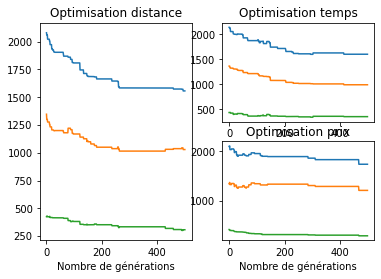

In [35]:
import sys

sys.setrecursionlimit(5000)

def mutation(chromosome):
    chromosome3 = copy.copy(chromosome)
    if 100 >= random.randint(0,100):
        firstGene = random.randint(1, len(chromosome3)-2)
        secondGene = random.randint(1, len(chromosome3)-2)
        chromosome3[firstGene], chromosome3[secondGene] = chromosome3[secondGene], chromosome3[firstGene]

        return chromosome3

    return chromosome3

def generateTournee(tailleMatrice, startTournee):
    tournee = []

    List = [i for i in range(0, len(tailleMatrice))]
    List.remove(int(startTournee))
    for j in range(tailleTournee):
        newPoint = random.choice(List)
        List.remove(newPoint)
        tournee.append(newPoint)
    tournee.insert(0, int(startTournee))
    #tournee.append(int(startTournee))

    return tournee

def populationInitial(matrice, tournee):
    chromosome = generate_matrice(len(tournee), len(matrice[0]))
    for k in range(0,len(chromosome)):
        for j in range(0,len(matrice)):
            chromosome[k][j] = matrice[tournee[k]][j]
    return chromosome

def afficheTournee(chromosome):
    tournee = []
    for i in range(0, len(chromosome)):
        for j in range(0, len(chromosome[0])):
            if chromosome[i][j] == 1:
                tournee.append(j)
                break
    return tournee

def fitnessDistance(chromosome):
    distance =0
    temps = 0
    cout = 0
    actuel = 0
    dest = 0

    heure = 0
    heure_passe = 0
    for i in range(len(chromosome)):
        for j in range(0, len(chromosome[0])):
            if chromosome[i][j] == 1:
                actuel = j
            try:
                if chromosome[i+1][j] == 1:
                    dest = j
                    distance += chromosome[i][dest][0]
                    if traffic:
                        if(heure+300 <= heure_passe <= heure+400) :
                            temps += chromosome[i][dest][1] * round(random.uniform(1.1,1.7),1)
                            heure_passe = temps
                        elif heure_passe >= heure+400:
                            heure = heure_passe
                        else:
                            temps += chromosome[i][dest][1]
                            heure_passe += temps
                    else:
                        temps += chromosome[i][dest][1]
                    cout += chromosome[i][dest][2]
            except:
                pass
    return distance,temps,cout

def comparaisonGen(chromosome1, chromosome2):
    distance1 = fitnessDistance(chromosome1)
    distance2 = fitnessDistance(chromosome2)

    if distance1 > distance2:
        chromosome1 = chromosome2

    return chromosome1

def algoGenetique(nbGeneration, matrice):
    startTournee = input("Entrez le point de départ : ")

    tournee = generateTournee(matrice, startTournee)

    chromosome1, liste = completMatriceTournee(len(matrice), tournee)
    index0 = chromosome1[0]
    chromosome1.append(index0)
    chromosome5 = copy.copy(chromosome1)
    chromosome3 = copy.copy(chromosome1)

    print("Chemin initiale : " + str(afficheTournee(chromosome1)))
    print("Distance total tournée initiale : "+ str(fitnessDistance(chromosome1))+ "km")

    for i in range(1, nbGeneration+1):
        print("Génération " +str(i))
        chromosome2 = mutation(chromosome1)

        distance1,temps1, cout1 = fitnessDistance(chromosome1)
        distance2,temps2, cout2 = fitnessDistance(chromosome2)

        if distance1 > distance2:
            chromosome1 = chromosome2

        distance1,temps1, cout1 = fitnessDistance(chromosome1)

        print("Chemin actuel :" + str(afficheTournee(chromosome1)))
        print("Distance total tournée actuel : "+ str(distance1) + "km")

        distanceTabl.append(fitnessDistance(chromosome1))

    for j in range(1, nbGeneration+1):
        print("Génération " +str(j))

        chromosome2 = mutation(chromosome3)

        distance3,temps3, cout3 = fitnessDistance(chromosome3)

        distance4,temps4, cout4 = fitnessDistance(chromosome2)

        if temps3 > temps4:
            chromosome3 = chromosome2

        distance3,temps3, cout3 = fitnessDistance(chromosome3)

        print("Chemin actuel :" + str(afficheTournee(chromosome3)))

        print("Temps total tournée actuel : "+ str(temps3) + "km")

        tempsTabl.append(fitnessDistance(chromosome3))

    for k in range(1, nbGeneration+1):
        print("Génération " +str(k))

        chromosome2 = mutation(chromosome5)

        distance5,temps5, cout5 = fitnessDistance(chromosome5)

        distance6,temps6, cout6 = fitnessDistance(chromosome2)

        if cout5 > cout6:
            chromosome5 = chromosome2

        distance5,temps5, cout5 = fitnessDistance(chromosome5)

        print("Chemin actuel :" + str(afficheTournee(chromosome5)))

        print("Cout total tournée actuel : "+ str(cout5) + "km")

        coutTabl.append(fitnessDistance(chromosome5))

    print("----------------------------------------------------")
    print("Meilleur chemin trouver par rapport à la distance : "+ str(afficheTournee(chromosome1)))
    affiche_chemin(liste, afficheTournee(chromosome1))
    print("Distance : "+ str(distance1) + "Km")
    print("Temps : "+ str(temps1) + "min")
    print("Cout : "+ str(cout1) + "€")
    print("----------------------------------------------------")
    print("Meilleur chemin trouver par rapport au temps : "+ str(afficheTournee(chromosome3)))
    affiche_chemin(liste, afficheTournee(chromosome3))
    print("Distance : "+ str(distance3) + "Km")
    print("Temps : "+ str(temps3) + "min")
    print("Cout : "+ str(cout3) + "€")
    print("----------------------------------------------------")
    print("Meilleur chemin trouver par rapport au cout : "+ str(afficheTournee(chromosome5)))
    affiche_chemin(liste, afficheTournee(chromosome5))
    print("Distance : "+ str(distance5) + "Km")
    print("Temps : "+ str(temps5) + "min")
    print("Cout : "+ str(cout5) + "€")
    print("----------------------------------------------------")

distanceTabl = []
tempsTabl = []
coutTabl = []

algoGenetique(max_iteration, matrice)

plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(distanceTabl)
plt.title('Optimisation distance')
plt.xlabel('Nombre de générations')
plt.subplot(2, 2, 2)
plt.plot(tempsTabl)
plt.title('Optimisation temps')
plt.xlabel('Nombre de générations')
plt.subplot(2, 2, 4)
plt.plot(coutTabl)
plt.title('Optimisation prix')
plt.xlabel('Nombre de générations')


plt.show()

# Étude statistique

Évaluation du temps en fonction du nombre de villes dans la tournée, de l'extraction du sous-graphe avec Dijkstra

![](img/stat50.png)
![](img/stat100.png)
![](img/matrice500.png)
![](img/stat1000.png)
![](img/stat_tableau.png)

Évaluation du temps de convergence en fonction de la taille de la tournée pour deux matrices.

![](img/statAlgo50.png)
![](img/statAlgo500.png)

### Notes et réfèrences

[Théorie des graphes - ressources technique de l'ingénieur](https://moodle-ingenieurs.cesi.fr/pluginfile.php/495242/mod_resource/content/4/res/ressources_TI_-_graphes.pdf)
[Choix de l'algorithme - Journal of Theoretical and Applied Computer Science](https://www.researchgate.net/publication/312889331_Choice_of_best_possible_metaheuristic_algorithm_for_the_travelling_salesman_problem_with_limited_computational_time_Quality_uncertainty_and_speed)
[Une approche génétique pour la résolution du problème VRPTW dynamique](https://www.lgi2a.univ-artois.fr/spip/IMG/pdf/these_haiyan_housroum.pdf)
[Métaheuristiques - ressource scholarvox](https://univ.scholarvox.com/reader/docid/88818856/page/1)
[Said Bourazza. Variantes d’algorithmes génétiques appliquéees aux problèmes d’ordonnancement.
Mathématiques [math]. Université du Havre, 2006. Français. fftel-00126292v2f](https://tel.archives-ouvertes.fr/tel-00126292/document)
[Comparison of eight evolutionary crossover operators for the vehicle routing problem](https://www.researchgate.net/publication/268043232_Comparison_of_eight_evolutionary_crossover_operators_for_the_vehicle_routing_problem)